In [1]:
from scipy import signal
import numpy as np
from scipy.fftpack import fft, ifft
import pandas as pd

import matplotlib
matplotlib.use('nbagg')
from pylab import rcParams
rcParams['figure.figsize'] = 9, 4
import matplotlib.pyplot as plt
import scipy

%load_ext autoreload
%autoreload 2
import sys
import copy

from pyha import Hardware, simulate, sims_close, Complex, resize, hardware_sims_equal
from pathlib import Path
from data import load_iq

<IPython.core.display.Javascript object>


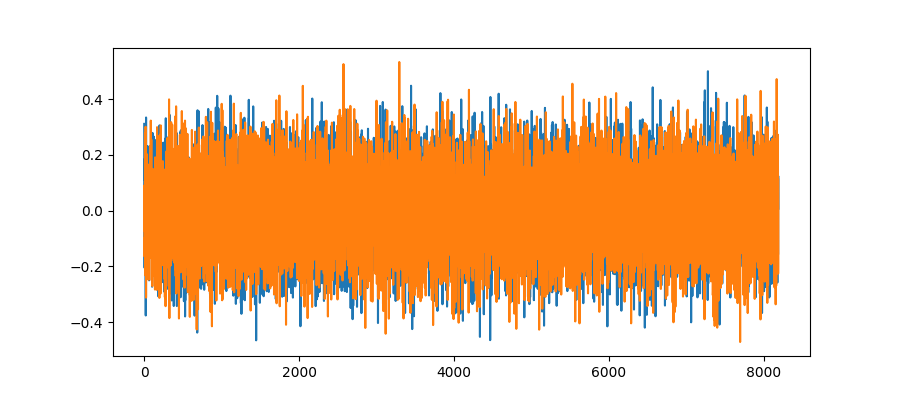

In [2]:
np.random.seed(0)
fft_size = 1024*8
sig = np.exp(2j*np.pi*np.linspace(0, 1, fft_size) * 1000)
noise = np.random.normal(size=len(sig)) + np.random.normal(size=len(sig))*1j
sig = sig + noise

# keep sig in -1..1 range
sig = sig / (max(sig.max(), abs(sig.min())))/2

plt.plot(sig.real)
plt.plot(sig.imag)
plt.show()

In [3]:
from pyhacores.filter import DCRemoval
dut = DCRemoval(window_len=256)
sim_out = simulate(dut, sig, simulations=['MODEL', 'PYHA', 'PYHA'],
                  conversion_path='/home/gaspar/git/pyhacores/playground')
assert sims_close(sim_out)

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 8193/8193 [00:04<00:00, 1709.87it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!
INFO:sim:sims_close(rtol=0.0001, atol=3.0517578125e-05)
INFO:sim:Using "MODEL" as golden output


INFO:sim:MODEL OK!
INFO:sim:PYHA OK!


<IPython.core.display.Javascript object>


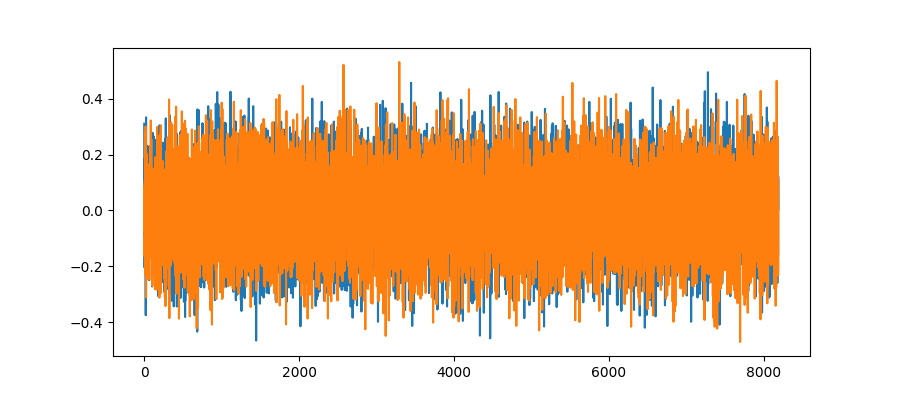

In [4]:
plt.plot(np.array(sim_out['MODEL']).real)
plt.plot(np.array(sim_out['MODEL']).imag)
plt.show()